In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target


## Train-Test Split & Standardization

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Fit Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Evaluate Model

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [5]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [6]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.9722222222222222
Recall: 0.9859154929577465


In [7]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.99737962659679


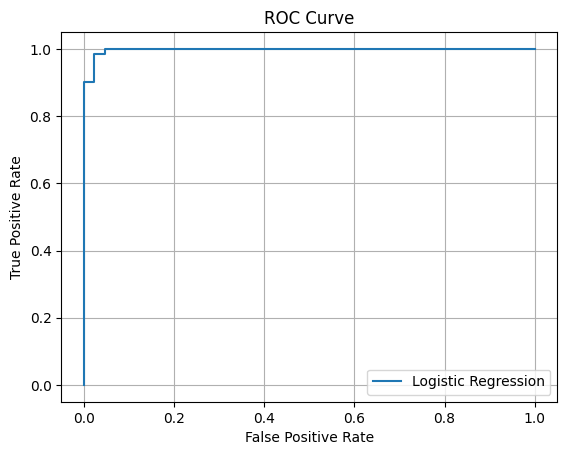

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## Tune Threshold & Explain Sigmoid

In [9]:
custom_threshold = 0.6
y_pred_custom = (y_proba >= custom_threshold).astype(int)
print("Precision (custom threshold):", precision_score(y_test, y_pred_custom))
print("Recall (custom threshold):", recall_score(y_test, y_pred_custom))

Precision (custom threshold): 0.9859154929577465
Recall (custom threshold): 0.9859154929577465


### 📌**Sigmoid Function:**
The sigmoid function is a mathematical function that maps any real-valued number to a value between 0 and 1. It is used in logistic regression to convert the linear output of the model into a probability.

